# Repeated k-Fold Cross-Validation for Model Evaluation in Python

by Jason Brownlee on August 3, 2020.[Here](https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/) in [Python Machine Learning](https://machinelearningmastery.com/category/python-machine-learning/)

The k-fold cross-validation procedure is a standard method for estimating the performance of a machine learning algorithm or configuration on a dataset.

A single run of the k-fold cross-validation procedure may result in a noisy estimate of model performance. Different splits of the data may result in very different results.

__Repeated k-fold cross-validation__ provides a way to `improve the estimated performance of a machine learning model. This involves simply repeating the cross-validation procedure multiple times and reporting the mean result across all folds from all runs`. This mean result is expected to be a more accurate estimate of the true unknown underlying mean performance of the model on the dataset, as __calculated using the standard error__.

After completing this tutorial, you will know:

- The mean performance reported from a single run of k-fold cross-validation may be noisy.
- Repeated k-fold cross-validation provides a way to reduce the error in the estimate of mean model performance.
- How to evaluate machine learning models using repeated k-fold cross-validation in Python.

## Tutorial Overview
This tutorial is divided into three parts; they are:

1. k-Fold Cross-Validation
2. Repeated k-Fold Cross-Validation
3. Repeated k-Fold Cross-Validation in Python

## 1. k-Fold Cross-Validation
The k-fold cross-validation `procedure divides a limited dataset into k` __non-overlapping__ `folds`. Each of the k folds is given an opportunity to be used as a held back test set, whilst all other folds collectively are used as a training dataset. A total of k models are fit and evaluated on the k hold-out test sets and the mean performance is reported.

Create a synthetic __binary classification__ dataset. We will configure it to generate 1,000 samples each with 20 input features, 15 of which contribute to the target variable.

In [1]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# create dataset
X, y = make_classification(n_samples=1000, 
                           n_features=20, 
                           n_informative=15, 
                           n_redundant=5, 
                           random_state=1)

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# create model
model = LogisticRegression()

# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Scores:', scores)
print('Accuracy: %.3f, STD: (%.3f)' % (mean(scores), std(scores)))

Scores: [0.89 0.82 0.92 0.88 0.91 0.82 0.86 0.86 0.85 0.87]
Accuracy: 0.868, STD: (0.032)


## 2. Repeated k-Fold Cross-Validation

The estimate of model performance via __k-fold cross-validation__ can be noisy.

This means that each time the procedure is run, `a different split of the dataset into k-folds can be implemented, and in turn, the distribution of performance scores can be different`, resulting in a different mean estimate of model performance.

- One __solution to reduce the noise in the estimated model performance is to increase the k-value__. This will reduce the bias in the model’s estimated performance, although it will increase the variance: e.g. tie the result more to the specific dataset used in the evaluation.
- An alternate approach is to repeat the k-fold cross-validation process multiple times and report the mean performance across all folds and all repeats. For example, if 10-fold cross-validation was repeated five times, 50 different held-out sets would be used to estimate model efficacy.

Common numbers of repeats include 3, 5, and 10. For example, if 3 repeats of 10-fold cross-validation are used to estimate the model performance, this means that (3 * 10) or 30 different models would need to be fit and evaluated.

As such, the approach is suited for small- to modestly-sized datasets and/or models that are not too computationally costly to fit and evaluate. This __suggests that the approach may be appropriate for linear models and not appropriate for slow-to-fit models like deep learning neural networks__.

## 3. Repeated k-Fold Cross-Validation in Python
The scikit-learn Python machine learning library provides an implementation of repeated k-fold cross-validation via the [RepeatedKFold class](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedKFold.html).

The main parameters are the number of folds (n_splits), which is the “k” in k-fold cross-validation, and the number of repeats (n_repeats).

In [2]:
# evaluate a logistic regression model using repeated k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# create dataset
X, y = make_classification(n_samples=1000, 
                           n_features=20, 
                           n_informative=15, 
                           n_redundant=5, 
                           random_state=1)

# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# create model
model = LogisticRegression()

# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Scores:', scores)
print('Accuracy: %.3f, STD: (%.3f)' % (mean(scores), std(scores)))

Scores: [0.89 0.82 0.92 0.88 0.91 0.82 0.86 0.86 0.85 0.87 0.83 0.85 0.8  0.84
 0.91 0.87 0.88 0.92 0.91 0.86 0.9  0.85 0.82 0.86 0.86 0.86 0.87 0.87
 0.87 0.91]
Accuracy: 0.867, STD: (0.031)


This may suggest that the single run result may be optimistic and that the result from three repeats might be a better estimate of the true mean model performance.

The expectation of repeated k-fold cross-validation is that the repeated mean would be a more reliable estimate of model performance than the result of a single k-fold cross-validation procedure.

This may mean less statistical noise.

The __standard error__ can provide an indication for a given sample size of the amount of error or the spread of error that may be expected from the sample mean to the underlying and unknown population mean.

Standard error can be calculated as follows:

- standard_error = sample_standard_deviation / sqrt(number of repeats)

In [3]:
# calculate the standard error for a sample using the sem() scipy function
from scipy import stats
print('Standard error:', stats.sem(scores))

Standard error: 0.005811865258054234


The example below demonstrates this by reporting model performance with 10-fold cross-validation with 1 to 15 repeats of the procedure.

We would expect that more repeats of the procedure would result in a more accurate estimate of the mean model performance, given the [law of large numbers](https://machinelearningmastery.com/a-gentle-introduction-to-the-law-of-large-numbers-in-machine-learning/). Although, the trials are not independent, so the underlying statistical principles become challenging.

In [4]:
# compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    
    # create model
    model = LogisticRegression()
    
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

# configurations to test
repeats = range(1,16)
results = list()
for r in repeats:
    # evaluate using a given number of repeats
    scores = evaluate_model(X, y, r)
    
    # summarize
    print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
    
    # store
    results.append(scores)

>1 mean=0.8680 se=0.011
>2 mean=0.8675 se=0.008
>3 mean=0.8673 se=0.006
>4 mean=0.8670 se=0.006
>5 mean=0.8658 se=0.005
>6 mean=0.8655 se=0.004
>7 mean=0.8651 se=0.004
>8 mean=0.8651 se=0.004
>9 mean=0.8656 se=0.003
>10 mean=0.8658 se=0.003
>11 mean=0.8655 se=0.003
>12 mean=0.8654 se=0.003
>13 mean=0.8652 se=0.003
>14 mean=0.8651 se=0.003
>15 mean=0.8653 se=0.003


In this case, we can see that the default of one repeat appears optimistic compared to the other results with an accuracy of about 86.80 percent compared to 86.73 percent and lower with differing numbers of repeats.

We can see that the mean seems to coalesce around a value of about 86.5 percent. We might take this as the stable estimate of model performance and in turn, choose 5 or 6 repeats that seem to approximate this value first.

Looking at the standard error, we can see that it decreases with an increase in the number of repeats and stabilizes with a value around 0.003 at around 9 or 10 repeats, although 5 repeats achieve a standard error of 0.005, half of that achieved with a single repeat.

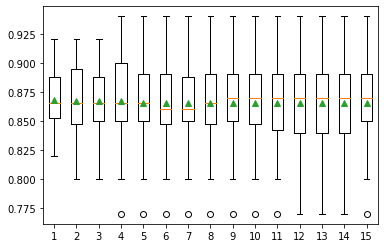

In [5]:
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

A box and whisker plot is created to summarize the distribution of scores for each number of repeats.

The orange line indicates the median of the distribution and the green triangle represents the arithmetic mean. If these symbols (values) coincide, it suggests a reasonable symmetric distribution and that the mean may capture the central tendency well.

This might provide an additional heuristic for choosing an appropriate number of repeats for your test harness.

Taking this into consideration, using five repeats with this chosen test harness and algorithm appears to be a good choice.